In [8]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.densenet import DenseNet201
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import keras.backend as K

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 2.2 MB/s eta 0:00:00


In [43]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import tensorflow

In [13]:
import cv2 as cv
from sklearn.model_selection import train_test_split



In [15]:
root="C:/Users/ahmad/Music/data/"

In [142]:
#reading the images and storing in array to split into test and val
x=[]
y=[]

classnames=os.listdir(root)
for clas in classnames :
    img_path=os.path.join(root,clas)
    class_num=classnames.index(clas)
    for image in os.listdir(img_path):
        #print(os.path.join(img_path,image))
        try:
            ip=img_path+'/'+image    
            print(ip)
            img_array=cv.imread(ip,cv.IMREAD_COLOR)
            print(img_array)
            n_array=cv.resize(img_array,(256,192))
            x.append(n_array)
            y.append(class_num)
        except:
            pass
        
        

C:/Users/ahmad/Music/data/Acne cyst/2 (1).gif
None
C:/Users/ahmad/Music/data/Acne cyst/2 (1).jpg
[[[  5  10   8]
  [  5  10   8]
  [  5  10   8]
  ...
  [201 193 200]
  [201 193 200]
  [201 193 200]]

 [[  5  10   8]
  [  5  10   8]
  [  5  10   8]
  ...
  [201 193 200]
  [201 193 200]
  [201 193 200]]

 [[  4   9   7]
  [  4   9   7]
  [  4   9   7]
  ...
  [201 193 200]
  [201 193 200]
  [201 193 200]]

 ...

 [[ 57  72 105]
  [ 60  75 108]
  [ 63  78 111]
  ...
  [206 200 201]
  [206 200 201]
  [205 199 200]]

 [[ 57  72 105]
  [ 60  75 108]
  [ 63  78 111]
  ...
  [206 200 201]
  [206 200 201]
  [205 199 200]]

 [[ 57  72 105]
  [ 60  75 108]
  [ 63  78 111]
  ...
  [206 200 201]
  [206 200 201]
  [205 199 200]]]
C:/Users/ahmad/Music/data/Acne cyst/2 (1).png
[[[147 177 235]
  [148 180 236]
  [147 180 236]
  ...
  [ 71  90 141]
  [ 64  90 142]
  [ 63  87 141]]

 [[148 178 237]
  [147 178 236]
  [155 184 234]
  ...
  [ 75  94 143]
  [ 68  91 143]
  [ 63  91 143]]

 [[148 176 235]
  [

C:/Users/ahmad/Music/data/Acne cyst/acne-cystic-128.jpg
[[[109 100 140]
  [111 102 142]
  [108  99 139]
  ...
  [120 121 159]
  [136 135 174]
  [ 98  97 136]]

 [[113 104 144]
  [131 122 162]
  [138 129 169]
  ...
  [126 126 162]
  [120 119 158]
  [ 63  63  99]]

 [[115 106 146]
  [129 120 160]
  [137 128 168]
  ...
  [117 116 150]
  [107 105 141]
  [ 66  65  99]]

 ...

 [[  1   0   4]
  [  4   3   5]
  [  1   0   2]
  ...
  [144 132 162]
  [144 132 162]
  [139 127 155]]

 [[  1   0   4]
  [  4   3   5]
  [  1   0   2]
  ...
  [140 128 158]
  [138 126 156]
  [129 117 145]]

 [[  1   0   4]
  [  4   3   5]
  [  1   0   2]
  ...
  [140 128 158]
  [137 125 155]
  [136 124 152]]]
C:/Users/ahmad/Music/data/Acne cyst/acne-cystic-131.jpg
[[[ 54  65 125]
  [ 55  66 126]
  [ 59  69 129]
  ...
  [ 45  52  77]
  [ 52  61  88]
  [ 29  38  65]]

 [[ 54  65 125]
  [ 56  67 127]
  [ 57  68 128]
  ...
  [  2   9  36]
  [ 28  36  65]
  [ 50  58  87]]

 [[ 53  66 128]
  [ 53  66 128]
  [ 53  66 128]
  

[[[159 161 231]
  [153 155 225]
  [166 168 238]
  ...
  [ 75  91 144]
  [ 82  96 149]
  [ 84  98 151]]

 [[146 148 218]
  [150 153 221]
  [159 161 231]
  ...
  [ 72  88 141]
  [ 79  93 146]
  [ 81  95 148]]

 [[139 142 210]
  [159 163 228]
  [167 170 238]
  ...
  [ 86 102 155]
  [ 86 100 153]
  [ 81  95 148]]

 ...

 [[132 132 202]
  [147 148 216]
  [155 154 220]
  ...
  [ 76  82 129]
  [ 82  87 132]
  [ 75  80 125]]

 [[138 136 206]
  [152 151 219]
  [153 151 217]
  ...
  [ 72  79 128]
  [ 83  87 135]
  [ 75  80 125]]

 [[133 130 199]
  [143 140 209]
  [156 154 220]
  ...
  [ 74  81 130]
  [ 86  90 138]
  [ 96 101 146]]]
C:/Users/ahmad/Music/data/Acne cyst/acne-cystic-95.jpg
[[[  5   4   6]
  [  5   4   6]
  [  3   2   4]
  ...
  [ 10   4   5]
  [ 10   4   5]
  [ 10   3   6]]

 [[  5   4   6]
  [  4   3   5]
  [  4   3   5]
  ...
  [ 10   4   5]
  [ 10   4   5]
  [ 10   3   6]]

 [[  6   5   7]
  [  3   2   4]
  [  9   6   8]
  ...
  [ 11   4   7]
  [ 11   4   7]
  [ 11   4   7]]

 ..

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
C:/Users/ahmad/Music/data/Acne other/acne-open-comedo-14.jpg
[[[29 45 57]
  [29 45 57]
  [18 34 46]
  ...
  [32 50 61]
  [25 43 54]
  [23 41 52]]

 [[27 43 55]
  [17 33 45]
  [18 34 46]
  ...
  [43 61 72]
  [42 60 71]
  [39 57 68]]

 [[17 33 45]
  [10 26 38]
  [16 32 44]
  ...
  [ 6 24 35]
  [ 8 26 37]
  [ 9 27 38]]

 ...

 [[40 53 67]
  [39 52 66]
  [37 53 66]
  ...
  [43 57 76]
  [40 54 73]
  [38 52 71]]

 [[41 54 68]
  [40 53 67]
  [38 54 67]
  ...
  [42 56 75]
  [40 54 73]
  [37 51 70]]

 [[43 56 70]
  [42 55 69]
  [39 55 68]
  ...
  [41 55 74]
  [39 53 72]
  [36 50 69]]]
C:/

[[[156 151 206]
  [161 156 211]
  [154 148 203]
  ...
  [164 155 206]
  [161 151 204]
  [143 135 188]]

 [[155 150 205]
  [151 146 201]
  [144 138 193]
  ...
  [161 148 200]
  [135 121 175]
  [141 128 182]]

 [[155 151 203]
  [152 148 200]
  [149 143 196]
  ...
  [174 151 205]
  [144 121 175]
  [137 114 168]]

 ...

 [[124 115 171]
  [127 118 174]
  [120 111 167]
  ...
  [137 126 164]
  [137 126 164]
  [136 126 162]]

 [[120 111 167]
  [126 117 173]
  [126 117 173]
  ...
  [137 126 164]
  [135 124 162]
  [132 122 158]]

 [[131 122 178]
  [120 111 167]
  [130 121 177]
  ...
  [135 124 162]
  [131 120 158]
  [128 118 154]]]
C:/Users/ahmad/Music/data/Acne other/acne-pustular-55.jpg
[[[108 130 196]
  [110 132 198]
  [ 93 117 183]
  ...
  [138 159 220]
  [129 150 211]
  [129 150 211]]

 [[129 151 217]
  [116 138 204]
  [108 132 198]
  ...
  [138 160 218]
  [133 155 213]
  [132 154 212]]

 [[121 143 208]
  [106 128 193]
  [113 137 203]
  ...
  [132 159 210]
  [127 154 205]
  [126 153 204]]



[[[116 111 166]
  [109 104 159]
  [111 106 161]
  ...
  [ 37  42  51]
  [ 55  61  68]
  [  8  14  21]]

 [[113 108 163]
  [116 111 166]
  [111 106 161]
  ...
  [ 17  22  31]
  [ 33  39  46]
  [ 38  44  51]]

 [[117 111 166]
  [114 108 163]
  [110 104 159]
  ...
  [ 12  18  25]
  [  2   8  15]
  [ 33  39  46]]

 ...

 [[ 15  13  13]
  [ 15  13  13]
  [ 15  13  13]
  ...
  [ 12  11  13]
  [ 11  10  12]
  [ 11  10  12]]

 [[ 15  13  13]
  [ 15  13  13]
  [ 15  13  13]
  ...
  [ 12  11  13]
  [ 11  10  12]
  [ 10   9  11]]

 [[ 13  11  11]
  [ 13  11  11]
  [ 12  10  10]
  ...
  [ 14  13  15]
  [ 13  12  14]
  [ 13  12  14]]]
C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/actinic-keratosis-face-39.jpg
[[[ 3 14 18]
  [ 8 19 23]
  [12 21 25]
  ...
  [21 23 34]
  [ 4  8 19]
  [11 15 26]]

 [[ 7 18 22]
  [ 8 19 23]
  [10 19 23]
  ...
  [22 24 35]
  [ 6 10 21]
  [12 16 27]]

 [[10 21 25]
  [ 9 20 24]
  [10 19 23]
  ...
  [18 22 33]
  [11 15 26]
  [18 22 33]]

 ...

 [[2

C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/actinic-keratosis-horn-11.jpg
[[[ 37  47  65]
  [ 38  48  66]
  [ 38  49  69]
  ...
  [ 58  75  96]
  [ 58  75  96]
  [ 59  76  97]]

 [[ 36  46  64]
  [ 37  47  65]
  [ 38  49  69]
  ...
  [ 62  79 100]
  [ 63  80 101]
  [ 64  81 102]]

 [[ 35  45  63]
  [ 37  47  65]
  [ 38  49  69]
  ...
  [ 67  84 105]
  [ 68  85 106]
  [ 68  85 106]]

 ...

 [[  6  23  32]
  [  5  22  31]
  [  3  20  29]
  ...
  [104 123 158]
  [105 124 157]
  [110 129 162]]

 [[  7  24  33]
  [  6  23  32]
  [  4  21  30]
  ...
  [106 126 161]
  [107 128 160]
  [114 135 167]]

 [[  7  24  33]
  [  6  23  32]
  [  4  21  30]
  ...
  [107 127 162]
  [109 130 162]
  [117 138 170]]]
C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/actinic-keratosis-horn-13.jpg
[[[ 73  72  98]
  [ 74  73  99]
  [ 74  72 101]
  ...
  [ 76  80 105]
  [ 76  80 105]
  [ 76  80 105]]

 [[ 73  72  98]
  [ 74  73  99]
  [ 74  72 101]
  ...
  [ 76  

[[[ 80  80 110]
  [ 86  86 116]
  [ 95  95 125]
  ...
  [ 49  50  76]
  [ 47  49  73]
  [ 42  44  68]]

 [[ 84  84 114]
  [ 90  90 120]
  [ 98  98 128]
  ...
  [ 55  56  82]
  [ 53  55  79]
  [ 47  49  73]]

 [[ 87  87 117]
  [ 92  92 122]
  [ 98 100 130]
  ...
  [ 60  60  84]
  [ 57  57  81]
  [ 51  51  75]]

 ...

 [[ 35  33  52]
  [ 33  31  50]
  [ 30  28  48]
  ...
  [ 67  71  95]
  [ 63  67  91]
  [ 59  63  87]]

 [[ 31  27  46]
  [ 29  25  44]
  [ 27  23  42]
  ...
  [ 68  72  96]
  [ 65  69  93]
  [ 63  67  91]]

 [[ 27  23  42]
  [ 25  21  40]
  [ 24  20  39]
  ...
  [ 71  75  99]
  [ 68  72  96]
  [ 66  70  94]]]
C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/actinic-keratosis-pigmented-3.jpg
[[[ 79 103 149]
  [ 91 115 161]
  [ 93 116 162]
  ...
  [110 126 173]
  [ 98 116 163]
  [ 96 114 161]]

 [[ 90 114 160]
  [ 96 120 166]
  [ 92 115 161]
  ...
  [ 91 107 154]
  [ 90 108 155]
  [102 120 167]]

 [[110 133 179]
  [ 96 119 165]
  [ 91 114 160]
  ...
  

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[21 39 62]
  [23 41 64]
  [23 44 66]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[21 39 62]
  [17 35 58]
  [23 41 64]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[20 38 61]
  [16 34 57]
  [22 40 63]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/ctcl-56.jpg
[[[137 151 203]
  [128 142 194]
  [127 141 194]
  ...
  [237 228 219]
  [229 220 211]
  [232 223 214]]

 [[126 140 192]
  [116 130 182]
  [112 126 179]
  ...
  [239 230 221]
  [232 223 214]
  [235 226 217]]

 [[118 134 187]
  [109 125 178]
  [102 117 173]
  ...
  [239 230 221]
  [233 224 215]
  [235 226 217]]

 ...

 [[199 180 177]
  [195 176 173]
  [188 171 168]
  ...
  [192 174 163]
  [190

[[[222 222 204]
  [228 228 210]
  [233 231 213]
  ...
  [224 227 201]
  [226 229 203]
  [229 232 206]]

 [[225 225 207]
  [227 227 209]
  [230 228 210]
  ...
  [225 228 202]
  [225 228 202]
  [225 228 202]]

 [[227 227 209]
  [226 226 208]
  [227 225 207]
  ...
  [229 232 206]
  [227 230 204]
  [223 226 200]]

 ...

 [[238 239 223]
  [243 244 228]
  [238 239 223]
  ...
  [247 247 231]
  [247 247 231]
  [247 247 231]]

 [[237 238 222]
  [242 243 227]
  [238 239 223]
  ...
  [246 246 230]
  [246 246 230]
  [246 246 230]]

 [[240 241 225]
  [244 245 229]
  [237 238 222]
  ...
  [245 245 229]
  [245 245 229]
  [245 245 229]]]
C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/metastasis-30.jpg
[[[ 59  78  99]
  [ 62  81 102]
  [ 57  76  97]
  ...
  [ 63  75  99]
  [ 59  71  95]
  [ 57  69  93]]

 [[ 62  81 102]
  [ 66  85 106]
  [ 60  79 100]
  ...
  [ 68  80 104]
  [ 66  78 102]
  [ 64  76 100]]

 [[ 59  78  99]
  [ 64  83 104]
  [ 61  80 101]
  ...
  [ 71  85 108]
  

C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/squamous-cell-carcinoma-face-9.jpg
[[[186 203 229]
  [177 194 220]
  [179 196 222]
  ...
  [ 73  89 131]
  [ 73  89 131]
  [ 73  89 131]]

 [[183 200 226]
  [179 196 222]
  [184 201 227]
  ...
  [ 73  89 131]
  [ 73  89 131]
  [ 73  89 131]]

 [[177 194 220]
  [179 196 222]
  [183 200 226]
  ...
  [ 74  90 132]
  [ 74  90 132]
  [ 74  90 132]]

 ...

 [[147 169 210]
  [149 174 214]
  [151 176 216]
  ...
  [ 97 107 147]
  [101 111 151]
  [103 113 153]]

 [[137 161 203]
  [144 168 210]
  [148 172 214]
  ...
  [ 98 108 148]
  [101 111 151]
  [103 113 153]]

 [[133 157 199]
  [140 164 206]
  [143 168 210]
  ...
  [ 98 108 148]
  [101 111 151]
  [102 112 152]]]
C:/Users/ahmad/Music/data/Actinic Keratosis and other Malignant Lesions/squamous-cell-carcinoma-hand-arm-2.jpg
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 60  91 100]
  [ 56  90  96]
  [ 53  87  93]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]


[[[100 105 144]
  [ 96 101 140]
  [ 95 103 140]
  ...
  [113 115 156]
  [102 104 145]
  [106 108 148]]

 [[ 92  97 136]
  [ 93  98 137]
  [ 93 101 138]
  ...
  [106 108 149]
  [108 110 150]
  [110 112 152]]

 [[ 92  98 135]
  [ 96 102 139]
  [ 97 103 140]
  ...
  [108 112 153]
  [109 114 153]
  [109 114 153]]

 ...

 [[130 141 171]
  [113 124 154]
  [ 95 106 136]
  ...
  [ 61  68  95]
  [ 58  65  92]
  [ 61  68  95]]

 [[ 99 112 144]
  [101 114 146]
  [108 121 153]
  ...
  [ 65  72  99]
  [ 63  70  97]
  [ 58  65  92]]

 [[111 123 157]
  [119 131 165]
  [113 125 159]
  ...
  [ 71  78 105]
  [ 74  81 108]
  [ 62  69  96]]]
C:/Users/ahmad/Music/data/basal cell/basal-cell-carcinoma-arm-1.jpg
[[[103 104 132]
  [126 127 155]
  [147 144 176]
  ...
  [ 50  54  79]
  [ 49  54  79]
  [ 42  47  72]]

 [[101 102 130]
  [121 122 150]
  [134 131 163]
  ...
  [ 60  64  89]
  [ 60  65  90]
  [ 51  56  81]]

 [[101 102 130]
  [121 122 150]
  [127 124 156]
  ...
  [ 67  71  96]
  [ 69  73  98]
  [ 60  

[[[182 201 208]
  [146 169 177]
  [154 181 191]
  ...
  [127 163 173]
  [151 183 194]
  [138 164 180]]

 [[189 213 219]
  [157 183 189]
  [139 168 177]
  ...
  [153 182 191]
  [170 194 206]
  [163 182 197]]

 [[135 168 171]
  [137 169 174]
  [121 154 163]
  ...
  [158 171 179]
  [200 209 219]
  [216 221 236]]

 ...

 [[ 76 130 155]
  [ 67 119 142]
  [118 168 188]
  ...
  [ 64 124 148]
  [ 61 117 142]
  [ 81 133 156]]

 [[108 146 180]
  [ 69 109 138]
  [ 89 134 155]
  ...
  [ 58 116 145]
  [ 63 117 147]
  [ 89 137 165]]

 [[129 161 197]
  [105 141 171]
  [ 76 119 140]
  ...
  [ 43 100 131]
  [ 62 116 146]
  [ 90 137 168]]]
C:/Users/ahmad/Music/data/basal cell/basal-cell-carcinoma-lesion-43.jpg
[[[ 77 122 173]
  [ 80 125 176]
  [ 81 125 178]
  ...
  [165 185 226]
  [149 169 210]
  [152 172 213]]

 [[ 73 117 170]
  [ 76 120 173]
  [ 77 121 174]
  ...
  [134 156 197]
  [131 153 194]
  [142 164 205]]

 [[ 66 112 166]
  [ 68 114 168]
  [ 71 115 169]
  ...
  [128 152 194]
  [128 152 194]
  [1

[[[171 185 203]
  [171 185 203]
  [170 184 203]
  ...
  [153 172 199]
  [150 169 196]
  [150 169 196]]

 [[172 186 204]
  [170 184 202]
  [168 182 201]
  ...
  [153 172 199]
  [151 170 197]
  [150 169 196]]

 [[170 184 202]
  [168 182 200]
  [166 180 199]
  ...
  [156 173 199]
  [155 172 199]
  [154 171 198]]

 ...

 [[144 171 198]
  [146 173 200]
  [146 173 200]
  ...
  [148 172 196]
  [150 174 198]
  [152 176 200]]

 [[142 168 198]
  [143 169 199]
  [142 168 198]
  ...
  [149 173 197]
  [148 174 198]
  [150 176 200]]

 [[135 161 191]
  [137 163 193]
  [137 163 193]
  ...
  [148 172 196]
  [148 174 198]
  [149 175 199]]]
C:/Users/ahmad/Music/data/basal cell/basal-cell-carcinoma-lid-14.jpg
[[[217 204 236]
  [249 237 255]
  [249 234 255]
  ...
  [115 121 164]
  [140 140 194]
  [148 146 205]]

 [[249 236 255]
  [239 227 255]
  [214 202 230]
  ...
  [119 124 169]
  [137 138 189]
  [144 143 199]]

 [[231 221 251]
  [201 194 221]
  [185 177 207]
  ...
  [108 117 161]
  [110 111 161]
  [134 

[[[107 103 139]
  [108 104 140]
  [106 102 138]
  ...
  [ 87  88 114]
  [ 90  91 117]
  [ 92  93 119]]

 [[104 100 136]
  [103  99 135]
  [101  97 133]
  ...
  [ 88  89 115]
  [ 91  92 118]
  [ 94  95 121]]

 [[107 103 139]
  [104 100 136]
  [102  98 133]
  ...
  [ 90  91 117]
  [ 94  95 121]
  [ 96  97 123]]

 ...

 [[ 22  24  34]
  [ 22  24  34]
  [ 22  24  34]
  ...
  [ 83  83  99]
  [ 85  85  99]
  [ 85  85  99]]

 [[ 19  22  30]
  [ 19  22  30]
  [ 20  23  31]
  ...
  [ 84  84 100]
  [ 86  86 100]
  [ 86  86 100]]

 [[ 17  20  28]
  [ 17  20  28]
  [ 18  21  29]
  ...
  [ 85  85 101]
  [ 86  86 100]
  [ 86  86 100]]]
C:/Users/ahmad/Music/data/basal cell/basal-cell-carcinoma-nose-60.jpg
[[[ 93  98 119]
  [ 92  97 118]
  [105 106 127]
  ...
  [109 113 138]
  [110 114 142]
  [113 117 145]]

 [[ 93  98 119]
  [ 91  94 115]
  [103 104 125]
  ...
  [110 114 139]
  [112 116 144]
  [115 119 147]]

 [[101 104 125]
  [ 91  94 115]
  [ 97  98 119]
  ...
  [113 117 142]
  [116 120 148]
  [121

[[[134 140 193]
  [134 141 191]
  [133 140 190]
  ...
  [156 170 199]
  [155 169 197]
  [155 169 197]]

 [[130 136 189]
  [131 138 188]
  [132 139 188]
  ...
  [156 170 199]
  [156 170 198]
  [156 170 198]]

 [[126 133 183]
  [128 135 185]
  [131 138 187]
  ...
  [157 171 200]
  [157 171 199]
  [157 171 199]]

 ...

 [[135 149 201]
  [138 152 204]
  [142 155 207]
  ...
  [143 153 200]
  [147 155 202]
  [151 159 206]]

 [[141 155 204]
  [143 157 206]
  [145 159 208]
  ...
  [145 158 204]
  [146 156 203]
  [147 157 204]]

 [[144 158 207]
  [145 159 208]
  [146 160 209]
  ...
  [149 162 208]
  [150 160 207]
  [151 161 208]]]
C:/Users/ahmad/Music/data/basal cell/basal-cell-carcinoma-pigmented-58.jpg
[[[131 143 201]
  [130 142 200]
  [120 132 190]
  ...
  [108 133 173]
  [110 135 175]
  [105 130 170]]

 [[136 148 206]
  [132 144 202]
  [125 137 195]
  ...
  [107 132 172]
  [108 133 173]
  [103 128 168]]

 [[137 149 207]
  [128 140 198]
  [125 139 197]
  ...
  [102 126 168]
  [108 132 174]
 

[[[ 55  50  49]
  [ 57  52  51]
  [ 58  53  52]
  ...
  [ 71  80 100]
  [ 47  54  73]
  [ 71  77  96]]

 [[ 54  49  48]
  [ 55  50  49]
  [ 56  51  50]
  ...
  [ 49  58  78]
  [ 54  61  81]
  [ 82  88 107]]

 [[ 52  47  48]
  [ 53  48  49]
  [ 52  47  48]
  ...
  [ 48  57  77]
  [ 67  74  94]
  [ 83  88 109]]

 ...

 [[112 125 151]
  [107 120 146]
  [104 117 143]
  ...
  [127 142 174]
  [133 146 178]
  [134 150 179]]

 [[116 129 155]
  [112 125 151]
  [ 98 111 137]
  ...
  [126 143 176]
  [126 141 174]
  [124 142 173]]

 [[109 122 148]
  [118 131 157]
  [105 118 144]
  ...
  [128 144 180]
  [127 144 177]
  [125 142 175]]]
C:/Users/ahmad/Music/data/basal cell/basal-cell-nevus-syndrome-7.jpg
[[[177 188 216]
  [175 186 214]
  [170 181 209]
  ...
  [134 101  75]
  [132  99  73]
  [131  99  70]]

 [[171 182 210]
  [170 181 209]
  [168 179 207]
  ...
  [133 100  74]
  [133 100  74]
  [133 100  74]]

 [[173 182 209]
  [172 181 208]
  [171 180 207]
  ...
  [130  99  74]
  [134 104  77]
  [135 

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[24 22 22]
  [30 28 28]
  [29 27 27]
  ...
  [ 3  0  2]
  [ 5  2  4]
  [ 9  6  8]]

 [[ 7  5  5]
  [12 10 10]
  [19 17 17]
  ...
  [ 2  0  1]
  [ 2  0  1]
  [ 8  5  7]]

 [[14 12 12]
  [19 17 17]
  [23 21 21]
  ...
  [12  9 11]
  [12  9 11]
  [ 5  2  4]]]
C:/Users/ahmad/Music/data/Eczema Photos/eczema-arms-9.jpg
[[[ 74  85 105]
  [ 74  85 105]
  [ 74  85 105]
  ...
  [ 10   6  11]
  [ 10   6  11]
  [ 10   6  11]]

 [[ 72  83 103]
  [ 77  88 108]
  [ 80  91 111]
  ...
  [ 10   6  11]
  [ 10   6  11]
  [ 10   6  11]]

 [[ 79  88 108]
  [ 80  89 109]
  [ 79  88 108]
  ...
  [ 10   6  11]
  [ 10   6  11]
  [ 10   6  11]]

 ...

 [[130 139 173]
  [135 144 178]
  [137 143 178]
  ...
  [ 63  64  78]
  [ 64  65  79]
  [ 64  65  79]]

[[[ 0  4  9]
  [ 0  4  9]
  [ 0  4  9]
  ...
  [ 0  4  9]
  [ 0  4  9]
  [ 0  4  9]]

 [[ 0  4  9]
  [ 0  4  9]
  [ 0  4  9]
  ...
  [ 0  4  9]
  [ 0  4  9]
  [ 0  4  9]]

 [[ 0  4  9]
  [ 0  4  9]
  [ 0  4  9]
  ...
  [ 0  4  9]
  [ 0  4  9]
  [ 0  4  9]]

 ...

 [[ 1  4 12]
  [ 1  4 12]
  [ 1  4 12]
  ...
  [ 2  4 14]
  [ 2  4 14]
  [ 2  4 14]]

 [[ 1  4 12]
  [ 1  4 12]
  [ 1  4 12]
  ...
  [ 2  4 14]
  [ 2  4 14]
  [ 2  4 14]]

 [[ 1  4 12]
  [ 1  4 12]
  [ 1  4 12]
  ...
  [ 2  4 14]
  [ 2  4 14]
  [ 2  4 14]]]
C:/Users/ahmad/Music/data/Eczema Photos/eczema-fingertips-109.jpg
[[[128 154 214]
  [126 152 212]
  [126 151 213]
  ...
  [  0   7  16]
  [  0   9  18]
  [  3  12  21]]

 [[130 156 216]
  [129 155 215]
  [128 153 215]
  ...
  [  0   7  16]
  [  0   9  18]
  [  2  11  20]]

 [[127 153 213]
  [127 153 213]
  [128 153 215]
  ...
  [  0   8  17]
  [  0   9  18]
  [  2  11  20]]

 ...

 [[ 54  81 125]
  [ 61  88 132]
  [ 63  90 134]
  ...
  [  1   8  17]
  [  1   8  17]
  [  1  

[[[ 16  12  18]
  [ 16  12  18]
  [ 17  13  19]
  ...
  [ 17  10  17]
  [ 17  10  17]
  [ 17  10  17]]

 [[ 16  12  18]
  [ 16  12  18]
  [ 17  13  19]
  ...
  [ 17  10  17]
  [ 17  10  17]
  [ 17  10  17]]

 [[ 16  12  18]
  [ 16  12  18]
  [ 16  12  18]
  ...
  [ 17  10  17]
  [ 17  10  17]
  [ 17  10  17]]

 ...

 [[ 22  16  27]
  [ 22  16  27]
  [ 23  17  28]
  ...
  [ 94  97 142]
  [ 93  96 141]
  [ 93  96 141]]

 [[ 22  16  27]
  [ 22  16  27]
  [ 22  16  27]
  ...
  [ 94  97 142]
  [ 93  96 141]
  [ 93  96 141]]

 [[ 21  15  26]
  [ 22  16  27]
  [ 22  16  27]
  ...
  [ 94  97 142]
  [ 94  97 142]
  [ 93  96 141]]]
C:/Users/ahmad/Music/data/Eczema Photos/eczema-fingertips-37.jpg
[[[ 86  90 118]
  [ 84  88 116]
  [ 83  87 115]
  ...
  [  6   5   9]
  [  6   5   9]
  [  6   5   9]]

 [[ 84  88 116]
  [ 84  88 116]
  [ 83  87 115]
  ...
  [  6   5   9]
  [  6   5   9]
  [  6   5   9]]

 [[ 83  87 115]
  [ 83  87 115]
  [ 83  87 115]
  ...
  [  6   5   9]
  [  6   5   9]
  [  6   5 

[[[ 56  83 147]
  [ 60  87 151]
  [ 53  81 142]
  ...
  [  0   9  23]
  [  0   9  23]
  [  0   9  23]]

 [[ 54  81 145]
  [ 53  80 144]
  [ 52  80 141]
  ...
  [  2  11  25]
  [  2  11  25]
  [  2  11  25]]

 [[ 52  79 143]
  [ 49  76 140]
  [ 55  83 144]
  ...
  [  3  12  26]
  [  3  12  26]
  [  3  12  26]]

 ...

 [[  0   3  17]
  [  0   3  17]
  [  1   5  16]
  ...
  [  3   5  15]
  [  3   5  15]
  [  3   5  15]]

 [[  0   3  17]
  [  0   3  17]
  [  0   5  16]
  ...
  [  3   5  15]
  [  3   5  15]
  [  3   5  15]]

 [[  0   3  17]
  [  0   3  17]
  [  0   5  16]
  ...
  [  3   5  15]
  [  3   5  15]
  [  3   5  15]]]
C:/Users/ahmad/Music/data/Eczema Photos/eczema-hand-152.jpg
[[[ 3 16 24]
  [ 4 17 25]
  [ 2 18 25]
  ...
  [ 5 18 26]
  [ 5 18 26]
  [ 5 18 26]]

 [[ 1 14 22]
  [ 2 15 23]
  [ 2 18 25]
  ...
  [ 4 17 25]
  [ 4 17 25]
  [ 4 17 25]]

 [[ 0 12 20]
  [ 1 14 22]
  [ 2 18 25]
  ...
  [ 3 16 24]
  [ 3 16 24]
  [ 3 16 24]]

 ...

 [[ 0  3  8]
  [11 17 22]
  [14 22 29]
  ...
 

[[[10 15 16]
  [ 4  9 10]
  [ 0  1  2]
  ...
  [10  9 11]
  [27 26 30]
  [20 19 23]]

 [[15 20 21]
  [15 20 21]
  [10 15 16]
  ...
  [ 5  4  6]
  [19 18 22]
  [13 12 16]]

 [[ 0  2  5]
  [ 7 12 15]
  [ 9 14 17]
  ...
  [ 2  1  3]
  [13 12 16]
  [ 9  8 12]]

 ...

 [[13 11 11]
  [14 12 12]
  [ 9  7  7]
  ...
  [ 3  0  2]
  [22 19 21]
  [29 26 28]]

 [[10  8  8]
  [12 10 10]
  [ 9  7  7]
  ...
  [ 5  2  4]
  [25 22 24]
  [30 27 29]]

 [[ 9  7  7]
  [14 12 12]
  [13 11 11]
  ...
  [ 9  6  8]
  [21 18 20]
  [15 12 14]]]
C:/Users/ahmad/Music/data/Eczema Photos/eczema-nummular-129.jpg
[[[4 5 3]
  [4 5 3]
  [4 4 4]
  ...
  [5 4 6]
  [5 4 6]
  [5 4 6]]

 [[4 5 3]
  [4 5 3]
  [4 4 4]
  ...
  [5 4 6]
  [5 4 6]
  [5 4 6]]

 [[5 6 4]
  [5 6 4]
  [5 5 5]
  ...
  [5 4 6]
  [5 4 6]
  [5 4 6]]

 ...

 [[4 5 3]
  [4 5 3]
  [4 5 3]
  ...
  [4 3 5]
  [4 3 5]
  [4 3 5]]

 [[4 5 3]
  [4 5 3]
  [4 5 3]
  ...
  [4 3 5]
  [4 3 5]
  [4 3 5]]

 [[4 5 3]
  [4 5 3]
  [4 5 3]
  ...
  [4 3 5]
  [4 3 5]
  [4 3 5]]]


C:/Users/ahmad/Music/data/Eczema Photos/eczema-subacute-85.jpg
[[[ 13  69 104]
  [ 14  70 105]
  [ 14  72 107]
  ...
  [ 12  76 107]
  [ 16  80 111]
  [ 23  87 118]]

 [[ 17  73 108]
  [ 18  74 109]
  [ 16  74 109]
  ...
  [ 15  79 110]
  [ 19  83 114]
  [ 23  87 118]]

 [[ 20  76 111]
  [ 19  75 110]
  [ 16  74 109]
  ...
  [ 18  79 111]
  [ 21  82 114]
  [ 21  82 114]]

 ...

 [[  1   2   0]
  [  1   2   0]
  [  1   1   1]
  ...
  [ 70 107 135]
  [ 67 106 134]
  [ 72 111 139]]

 [[  1   2   0]
  [  1   2   0]
  [  1   1   1]
  ...
  [ 76 113 141]
  [ 70 109 137]
  [ 71 110 138]]

 [[  1   2   0]
  [  1   2   0]
  [  1   1   1]
  ...
  [ 78 115 143]
  [ 72 111 139]
  [ 71 110 138]]]
C:/Users/ahmad/Music/data/Eczema Photos/eczema-subacute-90.jpg
[[[13 28 44]
  [14 29 45]
  [18 31 47]
  ...
  [ 2 14 24]
  [ 2 14 24]
  [ 2 14 24]]

 [[17 32 48]
  [16 31 47]
  [18 31 47]
  ...
  [ 2 14 24]
  [ 3 15 25]
  [ 4 16 26]]

 [[20 35 51]
  [19 34 50]
  [17 32 48]
  ...
  [ 1 13 23]
  [ 1 13 23]
 

[[[  5  17  29]
  [  5  17  29]
  [  5  17  29]
  ...
  [ 92 113 158]
  [ 86 109 154]
  [ 82 105 150]]

 [[  5  17  29]
  [  5  17  29]
  [  5  17  29]
  ...
  [ 88 109 154]
  [ 82 105 150]
  [ 79 102 147]]

 [[  5  17  29]
  [  5  17  29]
  [  5  17  29]
  ...
  [ 83 104 149]
  [ 79 102 147]
  [ 77 100 145]]

 ...

 [[ 58  79 130]
  [ 61  82 133]
  [ 57  78 129]
  ...
  [150 181 234]
  [150 181 234]
  [149 179 236]]

 [[ 61  85 131]
  [ 64  88 134]
  [ 59  82 130]
  ...
  [148 179 232]
  [148 179 232]
  [146 176 233]]

 [[ 57  82 126]
  [ 50  75 119]
  [ 58  82 128]
  ...
  [147 175 229]
  [143 174 227]
  [142 172 229]]]
C:/Users/ahmad/Music/data/Eczema Photos/maceration-2.jpg
[[[17 14 16]
  [ 9  6  8]
  [12  7  9]
  ...
  [12  9 11]
  [11  8 10]
  [ 9  6  8]]

 [[25 22 24]
  [32 29 31]
  [24 19 21]
  ...
  [11  8 10]
  [11  8 10]
  [ 9  6  8]]

 [[28 25 27]
  [35 32 34]
  [26 21 23]
  ...
  [11  8 10]
  [11  8 10]
  [10  7  9]]

 ...

 [[17 14 16]
  [22 19 21]
  [24 21 23]
  ...
  [1

[[[ 13  12  16]
  [ 13  12  16]
  [ 13  12  16]
  ...
  [ 13  12  14]
  [ 13  12  14]
  [ 13  12  14]]

 [[ 13  12  16]
  [ 13  12  16]
  [ 13  12  16]
  ...
  [ 13  12  14]
  [ 13  12  14]
  [ 13  12  14]]

 [[ 13  12  16]
  [ 13  12  16]
  [ 13  12  16]
  ...
  [ 13  12  14]
  [ 13  12  14]
  [ 13  12  14]]

 ...

 [[ 10   9  11]
  [ 10   9  11]
  [ 11  10  12]
  ...
  [114 137 193]
  [123 147 201]
  [127 150 206]]

 [[ 11  10  12]
  [ 11  10  12]
  [ 12  11  13]
  ...
  [104 130 184]
  [120 147 198]
  [130 156 210]]

 [[ 13  12  14]
  [ 13  12  14]
  [ 13  12  14]
  ...
  [129 156 207]
  [115 142 193]
  [107 134 185]]]
C:/Users/ahmad/Music/data/Eczema Photos/stasis-dermatitis-101.jpg
[[[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 9  4  5]
  [11  6  7]
  [12  7  8]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 8  3  4]
  [ 8  3  4]
  [ 8  3  4]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 7  2  3]
  [ 5  0  1]
  [ 4  0  0]]

 ...

 [[32 28 27]
  [25 21 20]
  [19 15 14]
 

[[[224 212 218]
  [223 211 217]
  [222 210 216]
  ...
  [207 208 218]
  [206 207 217]
  [204 205 215]]

 [[224 212 218]
  [224 212 218]
  [224 212 218]
  ...
  [206 207 217]
  [205 206 216]
  [204 205 215]]

 [[223 211 217]
  [224 212 218]
  [225 213 219]
  ...
  [206 207 217]
  [205 206 216]
  [203 204 214]]

 ...

 [[229 215 219]
  [229 215 219]
  [229 215 219]
  ...
  [220 214 219]
  [218 212 217]
  [217 212 214]]

 [[229 216 218]
  [228 215 217]
  [227 213 217]
  ...
  [222 216 221]
  [220 214 219]
  [217 211 216]]

 [[228 215 217]
  [226 213 215]
  [224 210 214]
  ...
  [222 215 222]
  [220 214 219]
  [215 209 214]]]
C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-108.jpg
[[[250 222 221]
  [251 223 222]
  [253 225 224]
  ...
  [255 225 230]
  [252 222 227]
  [250 220 225]]

 [[255 227 226]
  [254 226 225]
  [253 225 224]
  ...
  [254 224 229]
  [253 223 228]
  [252 222 227]]

 [[255 228 227]
  [255 227 226]
  [253 225 224]
  ...
  [252 222 22

[[[26 28 38]
  [27 29 39]
  [26 31 40]
  ...
  [ 5  4  6]
  [ 6  5  7]
  [ 7  6  8]]

 [[26 28 38]
  [27 29 39]
  [26 31 40]
  ...
  [ 5  4  6]
  [ 6  5  7]
  [ 7  6  8]]

 [[26 29 37]
  [27 30 38]
  [27 33 40]
  ...
  [ 5  4  6]
  [ 6  5  7]
  [ 7  6  8]]

 ...

 [[35 43 56]
  [35 43 56]
  [36 44 57]
  ...
  [ 5  5  5]
  [ 6  6  6]
  [ 6  6  6]]

 [[35 43 56]
  [35 43 56]
  [36 44 57]
  ...
  [ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]]

 [[35 43 56]
  [35 43 56]
  [36 44 57]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 2  2  2]]]
C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/becker-nevus-32.jpg
[[[12  4  4]
  [12  4  4]
  [12  4  4]
  ...
  [12  4  4]
  [12  4  4]
  [12  4  4]]

 [[12  4  4]
  [12  4  4]
  [12  4  4]
  ...
  [12  4  4]
  [12  4  4]
  [12  4  4]]

 [[12  4  4]
  [12  4  4]
  [12  4  4]
  ...
  [12  4  4]
  [12  4  4]
  [12  4  4]]

 ...

 [[12  4  4]
  [12  4  4]
  [12  4  4]
  ...
  [12  4  4]
  [12  4  4]
  [12  4  4]]

 [[10  5  4]
  [10  5  4]
  [10  5  4]
  ...
 

[[[ 76 104 135]
  [ 90 118 149]
  [105 133 164]
  ...
  [ 94 117 149]
  [ 96 117 149]
  [ 80 101 133]]

 [[100 128 159]
  [101 129 160]
  [ 94 122 153]
  ...
  [ 94 117 149]
  [109 130 162]
  [116 137 169]]

 [[ 91 119 150]
  [ 83 111 142]
  [ 78 106 137]
  ...
  [105 128 160]
  [123 144 176]
  [132 153 185]]

 ...

 [[ 83 104 132]
  [ 87 108 136]
  [ 82 104 132]
  ...
  [ 62  85 117]
  [ 65  88 120]
  [ 67  90 122]]

 [[ 67  88 116]
  [ 82 103 131]
  [ 90 112 140]
  ...
  [ 65  88 120]
  [ 66  89 121]
  [ 64  87 119]]

 [[ 77  98 126]
  [ 90 111 139]
  [ 91 113 141]
  ...
  [ 72  95 127]
  [ 72  95 127]
  [ 68  91 123]]]
C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/halo-nevus-27.jpg
[[[136 147 175]
  [162 173 201]
  [144 156 184]
  ...
  [106 126 151]
  [105 124 151]
  [108 127 154]]

 [[148 159 187]
  [163 174 202]
  [139 151 179]
  ...
  [107 127 152]
  [107 126 153]
  [110 129 156]]

 [[138 150 178]
  [146 158 186]
  [141 153 181]
  ...
  [105 125 150]
  [106 125 1

[[[116 106  89]
  [114 104  87]
  [112 102  85]
  ...
  [ 13   8   7]
  [ 16  11  10]
  [ 19  14  13]]

 [[116 106  89]
  [114 104  87]
  [112 102  85]
  ...
  [ 15  10   9]
  [ 16  11  10]
  [ 16  11  10]]

 [[116 106  88]
  [114 104  86]
  [112 102  84]
  ...
  [ 16  11  10]
  [ 14   9   8]
  [ 13   8   7]]

 ...

 [[ 35  43  50]
  [ 26  34  41]
  [ 26  34  41]
  ...
  [  4   3  12]
  [ 23  21  21]
  [ 38  31  38]]

 [[ 30  40  47]
  [ 27  37  44]
  [ 37  47  54]
  ...
  [  4   3  13]
  [ 22  20  20]
  [ 31  24  31]]

 [[ 31  41  48]
  [ 32  42  49]
  [ 50  60  67]
  ...
  [  3   4  14]
  [ 19  19  19]
  [ 28  20  30]]]
C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/malignant-melanoma-127.jpg
[[[ 85  87 141]
  [ 83  85 139]
  [ 82  85 136]
  ...
  [210 136  64]
  [210 136  64]
  [198 124  52]]

 [[ 85  87 141]
  [ 83  85 139]
  [ 81  84 135]
  ...
  [202 128  56]
  [204 130  58]
  [196 122  50]]

 [[ 88  90 144]
  [ 85  87 141]
  [ 84  87 138]
  ...
  [198 125  51]
  [

C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/melanocytic-nevi-24.jpg
[[[158 175 202]
  [156 173 200]
  [163 178 204]
  ...
  [167 191 215]
  [165 188 210]
  [157 180 202]]

 [[157 174 201]
  [161 178 205]
  [167 182 208]
  ...
  [156 180 204]
  [155 178 200]
  [150 173 195]]

 [[160 177 204]
  [167 184 211]
  [168 185 211]
  ...
  [152 176 200]
  [152 175 197]
  [150 173 195]]

 ...

 [[164 189 215]
  [164 187 213]
  [172 193 220]
  ...
  [166 189 211]
  [171 193 218]
  [164 186 211]]

 [[160 182 210]
  [162 184 212]
  [173 194 221]
  ...
  [164 187 209]
  [167 191 215]
  [162 186 210]]

 [[159 181 209]
  [163 185 213]
  [174 195 222]
  ...
  [165 188 210]
  [170 194 218]
  [171 195 219]]]
C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/melanocytic-nevi-33.jpg
[[[164 177 203]
  [163 176 202]
  [160 175 201]
  ...
  [127 141 159]
  [128 142 160]
  [128 142 160]]

 [[161 174 200]
  [164 177 203]
  [164 179 205]
  ...
  [128 142 160]
  [128 142 160]
  [128 1

[[[140 174 233]
  [127 161 220]
  [130 165 221]
  ...
  [123 163 216]
  [116 159 210]
  [132 175 226]]

 [[147 181 240]
  [131 165 224]
  [126 161 217]
  ...
  [147 187 240]
  [129 169 221]
  [110 150 202]]

 [[158 191 247]
  [143 176 232]
  [136 169 225]
  ...
  [152 190 244]
  [133 172 224]
  [103 142 194]]

 ...

 [[145 176 237]
  [154 185 246]
  [151 182 243]
  ...
  [152 180 227]
  [193 219 255]
  [172 198 245]]

 [[134 164 223]
  [130 160 219]
  [140 169 230]
  ...
  [152 180 227]
  [155 181 227]
  [ 80 104 150]]

 [[135 163 224]
  [105 133 194]
  [140 168 229]
  ...
  [148 181 226]
  [156 183 227]
  [ 19  44  88]]]
C:/Users/ahmad/Music/data/Melanoma Skin Cancer Nevi and Moles/nevus-spilus-11.jpg
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0

C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/alopecia-areata-67.jpg
[[[ 6  0  8]
  [ 7  0  9]
  [ 8  0  9]
  ...
  [11  3  4]
  [11  3  4]
  [11  3  4]]

 [[ 7  0  9]
  [ 8  0 10]
  [ 9  0 10]
  ...
  [11  3  4]
  [11  3  4]
  [11  3  4]]

 [[ 8  0 10]
  [ 9  0 11]
  [10  1 11]
  ...
  [11  2  5]
  [11  2  5]
  [11  2  5]]

 ...

 [[11  1  7]
  [11  1  7]
  [11  1  7]
  ...
  [11  2  5]
  [13  1  7]
  [11  1  7]]

 [[11  1  7]
  [11  1  7]
  [11  1  7]
  ...
  [13  2  4]
  [15  1  5]
  [13  2  5]]

 [[11  1  7]
  [11  1  7]
  [11  1  7]
  ...
  [15  2  4]
  [15  1  5]
  [15  1  5]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/alopecia-areata-75.jpg
[[[ 12   6   7]
  [ 15   9  10]
  [ 19  13  14]
  ...
  [ 54  51  67]
  [ 55  49  66]
  [ 54  48  65]]

 [[ 11   5   6]
  [ 13   7   8]
  [ 17  11  12]
  ...
  [ 57  54  70]
  [ 61  55  72]
  [ 62  56  73]]

 [[ 16  10  11]
  [ 17  11  12]
  [ 18  12  13]
  ...
  [ 55  52  68]
  [ 57  54  70]
  [ 60  57  73]]

[[[  0   1   9]
  [ 10  12  20]
  [ 13  16  21]
  ...
  [  7  13  26]
  [  7  13  26]
  [  8  14  27]]

 [[  0   2  10]
  [  6   8  16]
  [  6   9  14]
  ...
  [ 11  17  30]
  [  9  15  28]
  [  8  14  27]]

 [[  5   7  15]
  [ 11  13  21]
  [  9  11  19]
  ...
  [ 14  19  34]
  [ 12  17  32]
  [ 11  16  31]]

 ...

 [[ 20  16  22]
  [ 25  21  27]
  [ 22  20  26]
  ...
  [ 85  92 141]
  [ 92  99 148]
  [ 84  91 140]]

 [[ 21  17  22]
  [ 17  13  18]
  [ 18  16  22]
  ...
  [ 87  94 143]
  [ 93  98 147]
  [ 89  94 143]]

 [[ 19  15  20]
  [ 18  14  19]
  [ 20  18  24]
  ...
  [ 89  96 145]
  [ 90  95 144]
  [ 79  84 133]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/clubbing-3.jpg
[[[29  1  7]
  [29  1  7]
  [29  1  7]
  ...
  [39  0  8]
  [39  0  8]
  [39  0  8]]

 [[29  1  7]
  [29  1  7]
  [29  1  7]
  ...
  [39  0  8]
  [39  0  8]
  [39  0  8]]

 [[29  1  7]
  [29  1  7]
  [29  1  7]
  ...
  [39  0  8]
  [39  0  8]
  [39  0  8]]

 ...

 [[26  0  6]
  [26  0  6]
  [2

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 98 128 183]
  [ 96 127 182]
  [ 84 114 171]
  ...
  [ 33  38  83]
  [ 36  41  86]
  [ 37  42  87]]

 [[107 139 192]
  [103 134 189]
  [ 87 117 174]
  ...
  [ 34  39  84]
  [ 36  41  86]
  [ 37  42  87]]

 [[111 143 196]
  [106 138 191]
  [ 85 118 174]
  ...
  [ 35  40  85]
  [ 37  42  87]
  [ 36  41  86]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/distal-subungual-onychomycosis-161.jpg
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  

[[[ 7  6 10]
  [ 7  6 10]
  [ 7  6 10]
  ...
  [44 47 75]
  [48 51 79]
  [51 54 82]]

 [[ 7  6 10]
  [ 7  6 10]
  [ 7  6 10]
  ...
  [40 43 71]
  [43 46 74]
  [44 47 75]]

 [[ 7  6 10]
  [ 7  6 10]
  [ 7  6 10]
  ...
  [35 38 66]
  [38 41 69]
  [39 42 70]]

 ...

 [[13  9 15]
  [12  8 14]
  [12  8 14]
  ...
  [31 27 52]
  [30 26 51]
  [29 25 50]]

 [[13  9 15]
  [13  9 15]
  [13  9 15]
  ...
  [32 28 53]
  [31 27 52]
  [30 26 51]]

 [[13  9 15]
  [13  9 15]
  [13  9 15]
  ...
  [33 29 54]
  [32 28 53]
  [31 27 52]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/habit-tic-deformity-41.jpg
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 41  50  93]
  [ 46  55  98]
  [ 47  59 101]
  ...
  [ 37  48  86]
  

[[[  7   5   4]
  [  6   4   3]
  [  9   7   6]
  ...
  [ 68  76 106]
  [ 67  75 105]
  [ 68  76 106]]

 [[ 13  11  10]
  [ 10   8   7]
  [  7   5   4]
  ...
  [ 66  74 104]
  [ 71  79 109]
  [ 80  88 118]]

 [[ 15  13  12]
  [ 12  10   9]
  [  8   6   5]
  ...
  [ 79  87 117]
  [ 80  90 120]
  [ 90 100 130]]

 ...

 [[  9   7   7]
  [  8   6   6]
  [ 26  24  24]
  ...
  [ 16  15  17]
  [ 14  13  15]
  [  8   7   9]]

 [[ 13  11  11]
  [  9   7   7]
  [  6   4   4]
  ...
  [ 14  13  15]
  [ 15  14  16]
  [ 10   9  11]]

 [[ 21  19  19]
  [ 30  28  28]
  [ 18  16  16]
  ...
  [  9   8  10]
  [ 12  11  13]
  [ 10   9  11]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/lichen-planus-106.jpg
[[[ 35  71 101]
  [ 35  71 101]
  [ 28  64  94]
  ...
  [ 27  58  89]
  [ 38  69 100]
  [ 38  69 100]]

 [[ 31  65  95]
  [ 42  78 108]
  [ 39  73 103]
  ...
  [ 22  56  86]
  [ 32  63  94]
  [ 33  67  97]]

 [[ 39  70 101]
  [ 42  76 106]
  [ 51  83 112]
  ...
  [ 58  94 124]
  [ 74 10

[[[29 32 46]
  [28 31 45]
  [27 30 44]
  ...
  [19 13 24]
  [18 12 23]
  [22 16 27]]

 [[27 30 44]
  [27 30 44]
  [26 29 43]
  ...
  [16 10 21]
  [18 12 23]
  [22 16 27]]

 [[23 28 43]
  [24 29 44]
  [25 30 45]
  ...
  [18 12 23]
  [17 11 22]
  [15  9 20]]

 ...

 [[74 74 88]
  [71 71 85]
  [67 67 81]
  ...
  [22 15 28]
  [ 8  0 11]
  [40 32 43]]

 [[67 68 82]
  [65 66 80]
  [62 62 76]
  ...
  [11  4 17]
  [18 12 23]
  [43 37 48]]

 [[56 57 71]
  [54 55 69]
  [54 54 68]
  ...
  [45 38 51]
  [71 65 76]
  [42 36 47]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/median-nail-dystrophy-12.jpg
[[[ 72  79 122]
  [ 72  79 122]
  [ 74  81 124]
  ...
  [  2   2   2]
  [  1   1   1]
  [  1   1   1]]

 [[ 72  79 122]
  [ 72  79 122]
  [ 73  80 123]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[ 72  79 122]
  [ 72  79 122]
  [ 73  80 123]
  ...
  [  0   0   0]
  [  0   0   0]
  [  1   1   1]]

 ...

 [[ 74  83 117]
  [ 89  98 131]
  [ 99 109 139]
  ...
  [  2   0   3]


[[[ 14  17  22]
  [ 13  16  21]
  [ 12  14  22]
  ...
  [ 15  14  23]
  [ 14  13  22]
  [ 13  12  21]]

 [[ 12  15  20]
  [ 12  15  20]
  [ 12  14  22]
  ...
  [ 16  15  24]
  [ 17  16  25]
  [ 18  17  26]]

 [[ 14  17  22]
  [ 14  17  22]
  [ 13  15  23]
  ...
  [ 15  14  23]
  [ 17  16  25]
  [ 18  17  26]]

 ...

 [[ 17  15  21]
  [ 15  13  19]
  [ 16  16  22]
  ...
  [147 149 219]
  [143 145 215]
  [132 134 204]]

 [[ 19  17  23]
  [ 28  26  32]
  [ 17  17  23]
  ...
  [148 150 220]
  [141 143 213]
  [142 144 214]]

 [[ 17  15  21]
  [ 27  25  31]
  [ 17  17  23]
  ...
  [164 166 236]
  [157 159 229]
  [155 157 227]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/mucous-cyst-99.jpg
[[[ 11  13  21]
  [ 10  12  20]
  [  8  10  18]
  ...
  [ 29  48  61]
  [ 33  52  65]
  [ 28  47  60]]

 [[ 10  12  20]
  [  9  11  19]
  [  8  10  18]
  ...
  [ 28  47  60]
  [ 30  49  62]
  [ 26  45  58]]

 [[  8  10  18]
  [  8  10  18]
  [  8  10  18]
  ...
  [ 29  46  59]
  [ 29  46  

[[[ 10   7   3]
  [  8   3   0]
  [ 10   4   0]
  ...
  [  2   3   0]
  [  5   6   0]
  [  9   7   0]]

 [[  5   2   0]
  [ 14   9   6]
  [ 11   2   0]
  ...
  [ 10   7   2]
  [ 17  15   7]
  [ 20  17   9]]

 [[ 12   7   4]
  [ 20  13  10]
  [ 22  11   7]
  ...
  [ 23  16  13]
  [ 32  26  21]
  [ 35  26  22]]

 ...

 [[ 63  74 118]
  [ 75  86 130]
  [ 78  88 135]
  ...
  [  0   9  22]
  [  0   4  13]
  [  0   4  11]]

 [[ 66  76 123]
  [ 75  85 132]
  [ 83  93 140]
  ...
  [  2  11  24]
  [  0   5  14]
  [  0   5  12]]

 [[ 65  75 122]
  [ 73  83 130]
  [ 86  96 143]
  ...
  [  6  15  28]
  [  2   9  18]
  [  3   9  16]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/onycholysis-59.jpg
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  

[[[ 7  0  7]
  [17 10 17]
  [36 29 36]
  ...
  [12  9 18]
  [12  9 18]
  [10  7 16]]

 [[18 11 18]
  [ 6  0  6]
  [15  8 15]
  ...
  [12  9 18]
  [11  8 17]
  [10  7 16]]

 [[ 7  0  7]
  [11  4 11]
  [17 10 17]
  ...
  [12  9 18]
  [10  7 16]
  [ 9  6 15]]

 ...

 [[15 13 19]
  [ 5  3  9]
  [ 4  2  8]
  ...
  [ 9  6 15]
  [ 9  6 15]
  [ 8  5 14]]

 [[20 18 24]
  [ 7  5 11]
  [ 7  5 11]
  ...
  [ 9  6 15]
  [ 8  5 14]
  [ 8  5 14]]

 [[23 21 27]
  [10  8 14]
  [10  8 14]
  ...
  [ 9  6 15]
  [ 8  5 14]
  [ 8  5 14]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/pseudomonas-18.jpg
[[[ 21  33  87]
  [ 14  25  77]
  [  6  15  65]
  ...
  [ 53  79 125]
  [ 53  79 125]
  [ 55  79 125]]

 [[ 23  37  90]
  [ 20  32  86]
  [ 16  25  75]
  ...
  [ 54  80 126]
  [ 52  78 124]
  [ 50  74 120]]

 [[ 27  42  98]
  [ 24  40  93]
  [ 20  33  85]
  ...
  [ 60  86 132]
  [ 54  80 126]
  [ 50  74 120]]

 ...

 [[ 79 103 149]
  [ 86 110 156]
  [ 85 109 155]
  ...
  [128 140 204]
  [141 154

[[[  6   0  11]
  [ 18  12  23]
  [ 28  22  33]
  ...
  [ 70  75  96]
  [ 77  82 103]
  [ 72  77  98]]

 [[ 39  33  44]
  [ 24  18  29]
  [ 21  15  26]
  ...
  [ 70  75  96]
  [ 80  85 106]
  [ 83  88 109]]

 [[ 67  63  74]
  [ 41  37  48]
  [  7   3  14]
  ...
  [ 66  72  91]
  [ 72  78  97]
  [ 77  83 102]]

 ...

 [[  0   0   6]
  [  4   1  10]
  [ 14  10  21]
  ...
  [ 28  22  33]
  [ 29  25  36]
  [ 29  25  36]]

 [[ 16  12  23]
  [ 15  11  22]
  [ 35  31  42]
  ...
  [ 29  23  34]
  [ 29  25  36]
  [ 28  24  35]]

 [[ 17  13  24]
  [ 11   7  18]
  [ 33  29  40]
  ...
  [ 30  24  35]
  [ 29  25  36]
  [ 27  23  34]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/psoriasis-32.jpg
[[[ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]
  ...
  [15 19 30]
  [15 19 30]
  [17 21 32]]

 [[ 2  3  1]
  [ 2  3  1]
  [ 2  3  1]
  ...
  [16 20 31]
  [16 20 31]
  [17 21 32]]

 [[ 2  3  1]
  [ 2  3  1]
  [ 2  2  2]
  ...
  [17 21 32]
  [16 20 31]
  [17 21 32]]

 ...

 [[ 4  3  5]
  [ 4  3  5]
  

[[[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
C:/Users/ahmad/Music/data/Nail Fungus and other Nail Disease/subungual-hematoma-8.jpg
[[[  6   0   1]
  [  6   0   1]
  [  6   0   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  5   0   0]
  [  5   0   0]
  [  5   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  6   0   1]
  [  6   0   1]
  [  6   0   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[187 206 243]
  [200 222 255]
  [192 214 250]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[190 211 249]
  [191 212 250]
  [182 203 241]
  ...
  [  0   0   0]
  [  0  

[[[  7   2   3]
  [  7   2   3]
  [  7   2   3]
  ...
  [ 54  57  78]
  [ 54  57  78]
  [ 53  56  77]]

 [[  7   2   3]
  [  7   2   3]
  [  7   2   3]
  ...
  [ 55  58  79]
  [ 54  57  78]
  [ 53  56  77]]

 [[  7   2   3]
  [  7   2   3]
  [  7   2   3]
  ...
  [ 55  58  79]
  [ 54  57  78]
  [ 54  57  78]]

 ...

 [[112 107 136]
  [112 107 136]
  [112 107 136]
  ...
  [  2   1   3]
  [  2   1   3]
  [  2   1   3]]

 [[114 109 138]
  [115 110 139]
  [116 111 140]
  ...
  [  2   1   3]
  [  2   1   3]
  [  2   1   3]]

 [[111 106 135]
  [110 105 134]
  [113 108 137]
  ...
  [  5   4   6]
  [  5   4   6]
  [  5   4   6]]]
C:/Users/ahmad/Music/data/Psoriasis/08OilSpotPsoriasis1027.jpg
[[[ 71  73 104]
  [ 67  69 100]
  [ 68  70 101]
  ...
  [  8   7  11]
  [  8   7  11]
  [  8   7  11]]

 [[ 82  84 115]
  [ 74  76 107]
  [ 70  72 103]
  ...
  [  8   7  11]
  [  8   7  11]
  [  8   7  11]]

 [[ 74  76 107]
  [ 68  70 101]
  [ 66  69 100]
  ...
  [  7   6  10]
  [  7   6  10]
  [  7   6  1

[[[ 2  0  0]
  [ 5  3  3]
  [ 2  0  0]
  ...
  [ 6  6  6]
  [ 4  4  4]
  [ 0  0  0]]

 [[ 8  6  6]
  [12 10 10]
  [11  9  9]
  ...
  [11 11 11]
  [ 8  8  8]
  [ 2  2  2]]

 [[ 2  0  0]
  [ 6  4  4]
  [21 19 19]
  ...
  [14 14 14]
  [11 11 11]
  [ 5  5  5]]

 ...

 [[ 6  4  4]
  [ 9  7  7]
  [ 7  5  5]
  ...
  [20 17 19]
  [10  8  8]
  [ 2  0  0]]

 [[ 7  5  5]
  [ 6  4  4]
  [ 2  0  0]
  ...
  [ 7  4  6]
  [11  9  9]
  [ 6  4  4]]

 [[ 5  3  3]
  [ 2  0  0]
  [13 11 11]
  ...
  [ 9  6  8]
  [29 27 27]
  [ 7  5  5]]]
C:/Users/ahmad/Music/data/Psoriasis/Psoriasis-Guttate-55.jpg
[[[42 56 75]
  [47 61 80]
  [52 66 85]
  ...
  [30 39 52]
  [29 38 51]
  [24 33 46]]

 [[44 58 77]
  [48 62 81]
  [52 66 85]
  ...
  [28 37 50]
  [31 40 53]
  [27 36 49]]

 [[46 60 79]
  [49 63 82]
  [52 66 85]
  ...
  [24 33 47]
  [31 40 53]
  [34 43 56]]

 ...

 [[19 27 40]
  [21 29 42]
  [24 33 46]
  ...
  [31 42 50]
  [ 8 17 26]
  [ 3 12 21]]

 [[21 29 42]
  [19 27 40]
  [24 33 46]
  ...
  [22 35 43]
  [14 25 

[[[171 144 107]
  [167 141 105]
  [168 140 109]
  ...
  [223 195 160]
  [222 194 159]
  [221 193 158]]

 [[176 149 112]
  [172 144 109]
  [170 142 111]
  ...
  [219 191 156]
  [219 191 156]
  [218 190 155]]

 [[179 150 111]
  [173 146 109]
  [170 142 111]
  ...
  [218 191 154]
  [220 192 157]
  [221 193 158]]

 ...

 [[ 89 118 139]
  [ 84 113 134]
  [ 77 104 124]
  ...
  [236 233 225]
  [240 237 229]
  [246 243 235]]

 [[ 76 107 128]
  [ 77 108 129]
  [ 78 108 127]
  ...
  [239 236 228]
  [246 243 235]
  [243 240 232]]

 [[ 73 104 125]
  [ 78 109 130]
  [ 82 112 131]
  ...
  [242 239 231]
  [250 247 239]
  [241 238 230]]]
C:/Users/ahmad/Music/data/Psoriasis/Psoriasis-inversus-29.jpg
[[[ 30  44  62]
  [ 31  45  63]
  [ 26  40  58]
  ...
  [ 26  40  59]
  [ 15  29  48]
  [ 19  33  52]]

 [[ 27  41  59]
  [ 33  47  65]
  [ 37  51  69]
  ...
  [ 34  48  67]
  [ 19  33  52]
  [ 17  31  50]]

 [[ 23  37  55]
  [ 31  45  63]
  [ 35  49  67]
  ...
  [ 36  50  69]
  [ 20  34  53]
  [ 16  30  49

[[[  3  13  20]
  [  3  13  20]
  [  3  13  20]
  ...
  [172 161 169]
  [167 156 164]
  [177 166 174]]

 [[  6  16  23]
  [  6  16  23]
  [  5  15  22]
  ...
  [168 160 167]
  [157 149 156]
  [160 152 159]]

 [[  6  16  23]
  [  6  16  23]
  [  6  16  23]
  ...
  [148 144 150]
  [147 143 149]
  [159 155 161]]

 ...

 [[  1   3  13]
  [  1   3  13]
  [  1   3  13]
  ...
  [ 35  34  43]
  [ 25  24  33]
  [ 16  15  24]]

 [[  1   3  13]
  [  1   3  13]
  [  1   3  13]
  ...
  [ 35  34  43]
  [ 26  25  34]
  [ 21  20  29]]

 [[  1   3  13]
  [  1   3  13]
  [  1   3  13]
  ...
  [ 33  32  41]
  [ 27  26  35]
  [ 27  26  35]]]
C:/Users/ahmad/Music/data/Psoriasis/psoriasis-palms-soles-123.jpg
[[[  9   5  10]
  [ 13   9  14]
  [ 15  11  16]
  ...
  [ 61  66  87]
  [ 64  69  90]
  [ 69  74  95]]

 [[ 15  11  16]
  [ 18  14  19]
  [ 19  15  20]
  ...
  [ 69  74  95]
  [ 67  72  93]
  [ 65  70  91]]

 [[ 23  19  24]
  [ 25  21  26]
  [ 24  20  25]
  ...
  [ 73  78  99]
  [ 69  74  95]
  [ 65  70

[[[10  5  2]
  [11  7  6]
  [ 1  2  6]
  ...
  [ 9  5 10]
  [ 7  6 10]
  [ 5  7  8]]

 [[ 9  4  3]
  [ 9  4  5]
  [ 3  4  8]
  ...
  [11  5 10]
  [ 7  6  8]
  [ 5  7  8]]

 [[11  6  7]
  [ 8  5  7]
  [ 4  4 10]
  ...
  [12  5 10]
  [ 9  6  8]
  [ 7  7  7]]

 ...

 [[19 18 20]
  [ 0  2  9]
  [ 7 23 40]
  ...
  [11  6  8]
  [11  6  8]
  [11  6  8]]

 [[16 14 14]
  [ 4  7 12]
  [ 0  2 18]
  ...
  [11  6  8]
  [11  6  8]
  [11  6  8]]

 [[16 12 11]
  [13 16 20]
  [ 0  0 13]
  ...
  [11  6  8]
  [11  6  8]
  [11  6  8]]]
C:/Users/ahmad/Music/data/Psoriasis/Psoriasis-penis-17.jpg
[[[17  6  8]
  [15  4  6]
  [14  2  2]
  ...
  [47 16 49]
  [45 16 49]
  [44 15 48]]

 [[16  5  7]
  [14  3  5]
  [14  2  2]
  ...
  [49 18 51]
  [46 17 50]
  [46 17 50]]

 [[16  3  5]
  [16  3  5]
  [15  3  3]
  ...
  [50 19 52]
  [50 19 52]
  [49 18 51]]

 ...

 [[69 33 45]
  [68 32 44]
  [67 31 43]
  ...
  [27  6  5]
  [27  6  5]
  [27  6  5]]

 [[70 34 46]
  [68 32 44]
  [67 31 43]
  ...
  [27  6  5]
  [27  6  5

[[[ 95 104 131]
  [100 109 136]
  [102 111 138]
  ...
  [ 11   6   8]
  [ 11   6   8]
  [ 11   6   8]]

 [[ 91 100 127]
  [ 96 105 132]
  [ 99 108 135]
  ...
  [ 11   6   8]
  [ 11   6   8]
  [ 11   6   8]]

 [[ 96 105 132]
  [ 97 106 133]
  [ 96 105 132]
  ...
  [ 11   6   8]
  [ 11   6   8]
  [ 11   6   8]]

 ...

 [[123 146 191]
  [139 162 207]
  [139 162 208]
  ...
  [ 11  11  17]
  [  5   6  10]
  [  1   2   6]]

 [[123 146 191]
  [130 153 198]
  [142 165 211]
  ...
  [ 15  18  23]
  [ 10  13  18]
  [  6   9  14]]

 [[132 155 200]
  [124 147 192]
  [135 158 204]
  ...
  [ 19  22  27]
  [ 15  18  23]
  [ 12  15  20]]]
C:/Users/ahmad/Music/data/Psoriasis/psoriasis-scalp-109.jpg
[[[ 91  88 157]
  [ 84  81 150]
  [ 90  87 156]
  ...
  [ 45  51  70]
  [ 11  18  35]
  [ 13  20  37]]

 [[127 124 193]
  [103 100 169]
  [ 99  96 165]
  ...
  [ 47  53  72]
  [ 38  45  62]
  [ 25  32  49]]

 [[159 157 223]
  [115 113 179]
  [ 97  95 161]
  ...
  [ 41  48  67]
  [ 55  61  80]
  [ 54  60  79]]

[[[12  7  8]
  [ 9  4  5]
  [10  4  5]
  ...
  [11  4  7]
  [11  4  7]
  [11  4  7]]

 [[13  8  9]
  [11  6  7]
  [10  4  5]
  ...
  [11  4  7]
  [11  4  7]
  [11  4  7]]

 [[12  7  8]
  [12  7  8]
  [10  5  7]
  ...
  [11  4  7]
  [11  4  7]
  [11  4  7]]

 ...

 [[20 15 12]
  [ 5  0  0]
  [ 9  3  4]
  ...
  [11  5  6]
  [10  5  7]
  [10  5  7]]

 [[ 7  0  0]
  [15  7  7]
  [ 8  0  1]
  ...
  [11  5  6]
  [10  5  7]
  [10  5  7]]

 [[12  5  2]
  [22 15 12]
  [ 9  0  0]
  ...
  [11  5  6]
  [10  5  7]
  [10  5  7]]]
C:/Users/ahmad/Music/data/Psoriasis/psoriasis-scalp-83.jpg
[[[13  2 10]
  [13  5 12]
  [11  5 10]
  ...
  [10  5  7]
  [10  5  6]
  [10  5  6]]

 [[14  3 11]
  [10  2  9]
  [ 8  2  7]
  ...
  [10  5  7]
  [10  5  6]
  [10  5  6]]

 [[15  4 12]
  [ 8  0  7]
  [ 9  2  9]
  ...
  [10  5  7]
  [10  5  6]
  [10  5  6]]

 ...

 [[ 1  7 20]
  [44 49 64]
  [55 59 77]
  ...
  [11  6  8]
  [11  6  8]
  [11  6  8]]

 [[ 0  1 14]
  [25 30 45]
  [42 49 66]
  ...
  [11  6  8]
  [11  6  8

[[[  2   1   5]
  [  2   1   5]
  [  2   1   5]
  ...
  [  3   5   6]
  [  3   5   6]
  [  0   2   3]]

 [[  2   1   5]
  [  2   1   5]
  [  2   1   5]
  ...
  [  1   3   4]
  [  1   3   4]
  [  0   2   3]]

 [[  1   0   4]
  [  1   0   4]
  [  1   0   4]
  ...
  [  3   3   3]
  [  4   4   4]
  [  1   3   3]]

 ...

 [[ 30  18  16]
  [ 28  16  12]
  [ 48  35  27]
  ...
  [184 168 145]
  [171 155 132]
  [165 149 126]]

 [[ 24  10  11]
  [ 21   8   6]
  [ 26  12   6]
  ...
  [185 167 144]
  [170 152 129]
  [161 144 123]]

 [[ 24  10  11]
  [ 26  13  11]
  [ 31  15   9]
  ...
  [186 168 145]
  [177 159 136]
  [168 151 130]]]
C:/Users/ahmad/Music/data/ROSACEA/rosacea-117.jpg
[[[133 156 202]
  [109 132 178]
  [115 138 184]
  ...
  [ 95 114 157]
  [ 97 116 159]
  [105 122 165]]

 [[116 139 185]
  [113 136 182]
  [120 143 189]
  ...
  [ 97 116 159]
  [ 99 118 161]
  [101 118 161]]

 [[125 145 192]
  [128 148 195]
  [121 141 188]
  ...
  [101 118 161]
  [105 122 165]
  [105 121 164]]

 ...

 [

[[[ 12   0   6]
  [ 15   3   9]
  [ 18   7  10]
  ...
  [  6   1   0]
  [  5   0   0]
  [ 10   5   4]]

 [[ 16   4  10]
  [ 16   4  10]
  [ 15   4   7]
  ...
  [ 10   5   4]
  [ 11   6   5]
  [ 12   7   6]]

 [[ 16   5   8]
  [ 16   5   8]
  [ 15   4   7]
  ...
  [ 12   6   7]
  [ 12   7   6]
  [ 11   6   5]]

 ...

 [[176 141  75]
  [178 144  78]
  [175 143  78]
  ...
  [182 146  92]
  [182 146  92]
  [182 146  92]]

 [[180 147  78]
  [181 147  81]
  [175 143  78]
  ...
  [183 147  93]
  [183 147  93]
  [183 147  93]]

 [[184 151  82]
  [183 149  83]
  [175 143  78]
  ...
  [183 147  93]
  [183 147  93]
  [183 147  93]]]
C:/Users/ahmad/Music/data/ROSACEA/rosacea-60.jpg
[[[ 18  10  10]
  [ 15   7   7]
  [ 22  14  14]
  ...
  [150 153 158]
  [148 151 156]
  [146 151 154]]

 [[ 20  12  12]
  [ 12   4   4]
  [ 12   4   4]
  ...
  [151 154 159]
  [151 154 159]
  [149 154 157]]

 [[ 19  14  11]
  [ 13   8   5]
  [ 15  10   7]
  ...
  [148 152 157]
  [149 153 158]
  [150 154 159]]

 ...

 [[

[[[ 56  65  98]
  [ 50  59  92]
  [ 47  56  89]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 51  60  93]
  [ 59  68 101]
  [ 57  66  99]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 49  58  91]
  [ 58  67 100]
  [ 67  77 107]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 59  61  92]
  [ 57  59  90]
  [ 51  52  86]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 61  63  94]
  [ 60  62  93]
  [ 55  57  88]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 48  50  81]
  [ 54  56  87]
  [ 54  56  87]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
C:/Users/ahmad/Music/data/ROSACEA/rosacea-nose-16.jpg
[[[ 87  98 158]
  [ 81  92 152]
  [ 90 100 160]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[ 84  95 155]
  [ 95 106 166]
  [113 123 183]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[115 126 184]
  [ 93 104 162]
  [ 81  89 148]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 ...

[[[ 17  35  46]
  [ 40  58  69]
  [ 40  56  69]
  ...
  [102 107 152]
  [ 97 102 147]
  [ 97 102 147]]

 [[ 44  62  73]
  [ 35  53  64]
  [ 20  36  49]
  ...
  [ 98 103 148]
  [ 99 104 149]
  [ 99 104 149]]

 [[ 27  43  56]
  [ 21  37  50]
  [ 29  42  56]
  ...
  [ 98 104 147]
  [104 107 151]
  [103 106 150]]

 ...

 [[ 72  89 132]
  [101 118 161]
  [ 99 116 159]
  ...
  [157 150 217]
  [152 143 210]
  [139 130 197]]

 [[ 91 108 151]
  [103 120 163]
  [ 96 113 156]
  ...
  [154 149 218]
  [157 149 219]
  [138 130 200]]

 [[107 124 167]
  [ 94 111 154]
  [ 93 110 153]
  ...
  [151 146 215]
  [161 153 223]
  [144 136 206]]]


In [143]:
x_train, x_val,y_train, y_val = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.45, 
                                   shuffle=True)

In [144]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_val=np.array(x_val)
y_val=np.array(y_val)

In [145]:
y_train=to_categorical(y_train)

In [146]:
y_val=to_categorical(y_val)

In [21]:
print(x_train.shape)

(976, 192, 256, 3)


In [22]:
pre_trained_model = DenseNet201(input_shape=(192, 256, 3), include_top=False, weights="imagenet")

74836368/74836368 [==============================] - 24s 0us/step


In [23]:
for layer in pre_trained_model.layers:
    print(layer.name)
    if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
        layer.trainable = True
        K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
        K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
    else:
        layer.trainable = False

print(len(pre_trained_model.layers))

input_1
zero_padding2d
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_1
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3_b

In [24]:
last_layer = pre_trained_model.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 6, 8, 1920)


In [28]:
x = layers.GlobalMaxPooling2D()(last_output)
x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(9, activation='softmax')(x)


model = Model(pre_trained_model.input, x)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [29]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 198, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 96, 128, 64)  9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 96, 128, 64)  256         ['conv1/conv[0][0]']       

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 48, 64, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 48, 64, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 48, 64, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 48, 64, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 24, 32, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 24, 32, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 24, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 24, 32, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 24, 32, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 24, 32, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 24, 32, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 24, 32, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 24, 32, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 24, 32, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 24, 32, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 12, 16, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 12, 16, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 12, 16, 128)  40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 12, 16, 128)  512        ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 12, 16, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 12, 16, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 12, 16, 32)   36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 12, 16, 480)  0          ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 12, 16, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 12, 16, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 12, 16, 608)  0          ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 12, 16, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 12, 16, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 12, 16, 896)  0          ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 12, 16, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 12, 16, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 12, 16, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 12, 16, 128)  131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 12, 16, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 12, 16, 1312  0          ['conv4_block32_concat[0][0]',   
 ate)                           )                                 'conv4_block33_2_conv[0][0]']   
                                                                                                  
 conv4_block34_0_bn (BatchNorma  (None, 12, 16, 1312  5248       ['conv4_block33_concat[0][0]']   
 lization)                      )                                                                 
          

                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 12, 16, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 12, 16, 1440  0          ['conv4_block38_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block38_1_conv (Conv2D)  (None, 12, 16, 128)  184320      ['conv4_block38_0_relu[0][0]']   
                                                                                                  
 conv4_block38_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block38_1_conv[0][0]']   
 lization)

 conv4_block42_1_conv (Conv2D)  (None, 12, 16, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block42_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block42_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 12, 16, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)                           )                                 'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 12, 16, 1728  6912       ['conv4_block46_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block47_0_relu (Activati  (None, 12, 16, 1728  0          ['conv4_block47_0_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 6, 8, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 6, 8, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 6, 8, 960)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 6, 8, 960)   3840        ['conv5_block2_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 6, 8, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 6, 8, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, 6, 8, 128)    139264      ['conv5_block7_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 6, 8, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 6, 8, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 6, 8, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block11_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 6, 8, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_block16_0_bn (BatchNorma  (None, 6, 8, 1376)  5504        ['conv5_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block20_0_bn (BatchNorma  (None, 6, 8, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 6, 8, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 6, 8, 128)    192512      ['conv5_block20_0_relu[0][0]']   
                                                                                                  
 conv5_block20_1_bn (BatchNorma  (None, 6, 8, 128)   512         ['conv5_block20_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 6, 8, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 6, 8, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block24_1_relu[0][0]']   
                                                                                                  
 conv5_block24_concat (Concaten  (None, 6, 8, 1664)  0           ['conv5_block23_concat[0][0]',   
 ate)     

 conv5_block28_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 6, 8, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 6, 8, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block29_0_relu (Activati  (None, 6, 8, 1792)  0           ['conv5_block29_0_bn[0][0]']     
 on)                                                                                              
          

 relu (Activation)              (None, 6, 8, 1920)   0           ['bn[0][0]']                     
                                                                                                  
 global_max_pooling2d_1 (Global  (None, 1920)        0           ['relu[0][0]']                   
 MaxPooling2D)                                                                                    
                                                                                                  
 dense_2 (Dense)                (None, 512)          983552      ['global_max_pooling2d_1[0][0]'] 
                                                                                                  
 dropout_1 (Dropout)            (None, 512)          0           ['dense_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 9)            4617        ['dropout_1[0][0]']              
          

In [30]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(x_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(x_val)

In [32]:
batch_size = 32
epochs = 6
history = model.fit(train_datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(x_val, y_val),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size), 
                              validation_steps=(x_val.shape[0] // batch_size))

Epoch 1/6
30/30 [==============================] - 367s 12s/step - loss: 4.5909 - accuracy: 0.1854 - val_loss: 549040500506624.0000 - val_accuracy: 0.0656
Epoch 2/6
30/30 [==============================] - 352s 12s/step - loss: 3.2505 - accuracy: 0.2479 - val_loss: 2031517.6250 - val_accuracy: 0.0750
Epoch 3/6
30/30 [==============================] - 344s 12s/step - loss: 2.5355 - accuracy: 0.2987 - val_loss: 691.6292 - val_accuracy: 0.0781
Epoch 4/6
30/30 [==============================] - 349s 12s/step - loss: 2.2404 - accuracy: 0.3072 - val_loss: 3.3042 - val_accuracy: 0.1250
Epoch 5/6
30/30 [==============================] - 404s 14s/step - loss: 1.9847 - accuracy: 0.3358 - val_loss: 2.1192 - val_accuracy: 0.2344
Epoch 6/6
30/30 [==============================] - 414s 14s/step - loss: 1.9050 - accuracy: 0.3369 - val_loss: 2.0250 - val_accuracy: 0.2625


In [33]:
pre_trained_model.layers[481].name


'conv5_block1_0_bn'

In [34]:
for layer in pre_trained_model.layers[481:]:
    layer.trainable = True

In [35]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 198, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 96, 128, 64)  9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 96, 128, 64)  256         ['conv1/conv[0][0]']       

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 48, 64, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 48, 64, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 48, 64, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 48, 64, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 24, 32, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 24, 32, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 24, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 24, 32, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 24, 32, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 24, 32, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 24, 32, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 24, 32, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 24, 32, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 24, 32, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 24, 32, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 12, 16, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 12, 16, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 12, 16, 128)  40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 12, 16, 128)  512        ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 12, 16, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 12, 16, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 12, 16, 32)   36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 12, 16, 480)  0          ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 12, 16, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 12, 16, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 12, 16, 608)  0          ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 12, 16, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 12, 16, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 12, 16, 896)  0          ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 12, 16, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 12, 16, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 12, 16, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 12, 16, 128)  131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 12, 16, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 12, 16, 1312  0          ['conv4_block32_concat[0][0]',   
 ate)                           )                                 'conv4_block33_2_conv[0][0]']   
                                                                                                  
 conv4_block34_0_bn (BatchNorma  (None, 12, 16, 1312  5248       ['conv4_block33_concat[0][0]']   
 lization)                      )                                                                 
          

                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 12, 16, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 12, 16, 1440  0          ['conv4_block38_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block38_1_conv (Conv2D)  (None, 12, 16, 128)  184320      ['conv4_block38_0_relu[0][0]']   
                                                                                                  
 conv4_block38_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block38_1_conv[0][0]']   
 lization)

 conv4_block42_1_conv (Conv2D)  (None, 12, 16, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 12, 16, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 12, 16, 128)  0          ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block42_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block42_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 12, 16, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 12, 16, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)                           )                                 'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 12, 16, 1728  6912       ['conv4_block46_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block47_0_relu (Activati  (None, 12, 16, 1728  0          ['conv4_block47_0_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 6, 8, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 6, 8, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 6, 8, 960)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 6, 8, 960)   3840        ['conv5_block2_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 6, 8, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 6, 8, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, 6, 8, 128)    139264      ['conv5_block7_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 6, 8, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 6, 8, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 6, 8, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block11_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 6, 8, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_block16_0_bn (BatchNorma  (None, 6, 8, 1376)  5504        ['conv5_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block20_0_bn (BatchNorma  (None, 6, 8, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 6, 8, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 6, 8, 128)    192512      ['conv5_block20_0_relu[0][0]']   
                                                                                                  
 conv5_block20_1_bn (BatchNorma  (None, 6, 8, 128)   512         ['conv5_block20_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 6, 8, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 6, 8, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block24_1_relu[0][0]']   
                                                                                                  
 conv5_block24_concat (Concaten  (None, 6, 8, 1664)  0           ['conv5_block23_concat[0][0]',   
 ate)     

 conv5_block28_2_conv (Conv2D)  (None, 6, 8, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 6, 8, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 6, 8, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block29_0_relu (Activati  (None, 6, 8, 1792)  0           ['conv5_block29_0_bn[0][0]']     
 on)                                                                                              
          

 relu (Activation)              (None, 6, 8, 1920)   0           ['bn[0][0]']                     
                                                                                                  
 global_max_pooling2d_1 (Global  (None, 1920)        0           ['relu[0][0]']                   
 MaxPooling2D)                                                                                    
                                                                                                  
 dense_2 (Dense)                (None, 512)          983552      ['global_max_pooling2d_1[0][0]'] 
                                                                                                  
 dropout_1 (Dropout)            (None, 512)          0           ['dense_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 9)            4617        ['dropout_1[0][0]']              
          

In [39]:
batch_size = 32
epochs = 30
history = model.fit(train_datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(x_val, y_val),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size),
                              validation_steps=(x_val.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

Epoch 1/30
30/30 [==============================] - 409s 14s/step - loss: 1.6185 - acc: 0.4153 - val_loss: 1.7622 - val_acc: 0.4031 - lr: 1.0000e-04
Epoch 2/30
30/30 [==============================] - 418s 14s/step - loss: 1.4597 - acc: 0.4936 - val_loss: 1.6653 - val_acc: 0.4375 - lr: 1.0000e-04
Epoch 3/30
30/30 [==============================] - 375s 13s/step - loss: 1.2937 - acc: 0.5339 - val_loss: 1.5758 - val_acc: 0.4563 - lr: 1.0000e-04
Epoch 4/30
30/30 [==============================] - 373s 12s/step - loss: 1.2220 - acc: 0.5498 - val_loss: 1.5138 - val_acc: 0.4719 - lr: 1.0000e-04
Epoch 5/30
30/30 [==============================] - 368s 12s/step - loss: 1.1287 - acc: 0.6081 - val_loss: 1.4107 - val_acc: 0.5281 - lr: 1.0000e-04
Epoch 6/30
30/30 [==============================] - 374s 13s/step - loss: 1.0533 - acc: 0.6229 - val_loss: 1.4177 - val_acc: 0.5063 - lr: 1.0000e-04
Epoch 7/30
30/30 [==============================] - 387s 13s/step - loss: 0.9848 - acc: 0.6663 - val_loss:

In [40]:
model.save('dense-net-finetuned')

INFO:tensorflow:Assets written to: dense-net-finetuned\assets


INFO:tensorflow:Assets written to: dense-net-finetuned\assets


In [120]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [164]:
img=load_img("C:/Users/ahmad/Music/data/Acne cyst/2 (2).jpg",target_size=(192,256))

In [165]:
x=img_to_array(img)

In [166]:
x=x.reshape((1,192,256,3))

In [167]:
b=model.predict(x)

1/1 [==============================] - 0s 297ms/step


In [168]:
print(classnames[np.argmax(b)])

Acne cyst


In [41]:
layer_outputs=[layer.output for layer in model.layers[1:]]

In [93]:
visualize_model=tensorflow.keras.models.Model(inputs=model.input,outputs=layer_outputs)

In [161]:
img=load_img("C:/Users/ahmad/Music/data/Acne cyst/2 (2).jpg",target_size=(192,256))

In [162]:
x=img_to_array(img)

In [163]:
x.shape

(192, 256, 3)

In [151]:
loss_test, acc_test = model.evaluate(x_val, y_val, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

19/19 [==============================] - 46s 2s/step - loss: 0.8307 - acc: 0.7696
Test: accuracy = 0.769625  ;  loss = 0.830698


In [152]:
print(y_val.shape)

(586, 9)


In [158]:
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import f1_score,confusion_matrix,classification_report

19/19 [==============================] - 46s 2s/step
there were 135 errors in 586 tests for an accuracy of  76.96


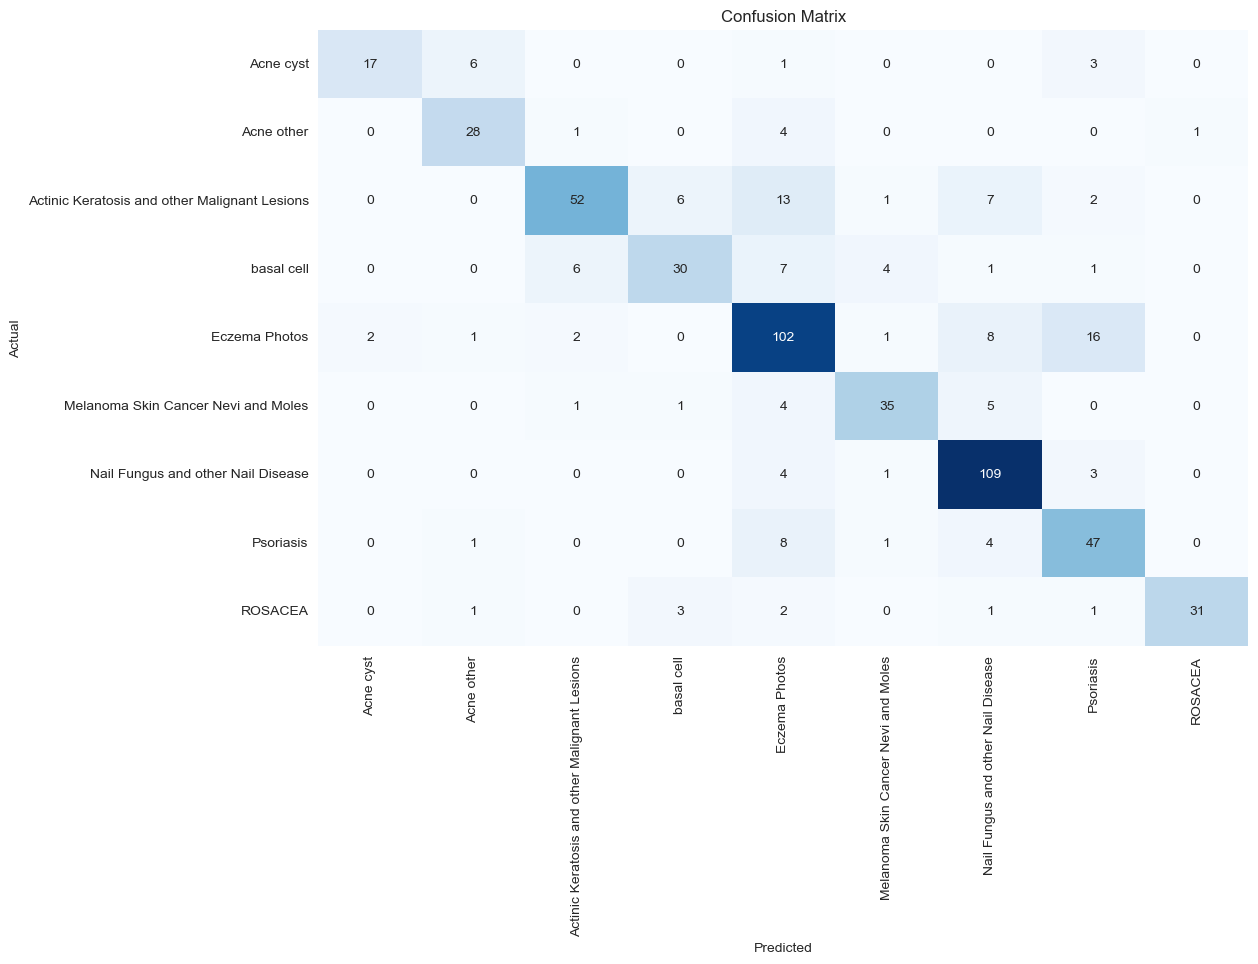

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                                    Acne cyst     0.8947    0.6296    0.7391        27
                                   Acne other     0.7568    0.8235    0.7887        34
Actinic Keratosis and other Malignant Lesions     0.8387    0.6420    0.7273        81
                                   basal cell     0.7500    0.6122    0.6742        49
                                Eczema Photos     0.7034    0.7727    0.7365       132
          Melanoma Skin Cancer Nevi and Moles     0.8140    0.7609    0.7865        46
           Nail Fungus and other Nail Disease     0.8074    0.9316    0.8651       117
                                    Psoriasis     0.6438    0.7705    0.7015        61
                                      ROSACEA     0.9688    0.7949    0.8732        39

                                     accuracy                         0.7696     

In [159]:
def predictor(Cn,y_val,x_val):    
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=[]
    classes=Cn
    class_count=len(classes)
    errors=0
    preds=model.predict(x_val, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):        
        pred_index=np.argmax(p)        
        true_index=np.argmax(y_val[i])  # labels are integer values 
        
        if pred_index != true_index: # a misclassification has occurred                                          
            errors=errors + 1
            file='oo'
            error_list.append(file)
            error_class=classes[pred_index]
            error_pred_list.append(error_class)
        y_true.append(true_index)
        y_pred.append(pred_index)
           
    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    print(msg) # cyan foreground
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)      
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, error_pred_list, f1score

errors, tests, error_list, error_pred_list, f1score =predictor(classnames,y_val,x_val)

In [6]:
classnames=['Acne cyst','Acne other','Actinic Keratosis and other Malignant Lesions',' basal cell','Eczema Photos','Melanoma Skin Cancer Nevi and Moles','Nail Fungus and other Nail Disease','Psoriasis','ROSACEA',]

In [110]:
x=x.reshape((1,192,256,3))

In [111]:
x=x/255

In [112]:
featuremaps=visualize_model.predict(x)

1/1 [==============================] - 0s 279ms/step


In [2]:
import tensorflow as tf

In [3]:
model_path = "C:/Users/icl/Desktop/New folder/dense-net-finetuned"
model = tf.saved_model.load(model_path)

In [20]:

import tensorflow as tf
 
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/icl/Desktop/New folder/dense-net-finetuned") 
tflite_model = converter.convert()
 
# Save the model.
with open('fruits_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [19]:
img=load_img('C:/Users/icl/Desktop/t3.jpeg',target_size=(192,256))
x=img_to_array(img)
x=x.reshape((1,192,256,3))
b=model(x)
print(classnames[np.argmax(b)])

Psoriasis


In [61]:
tf.__version__

'2.11.0'

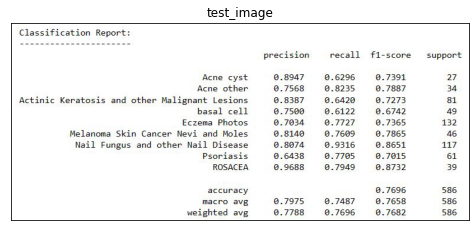

In [85]:
import matplotlib.pyplot as plt
import os
import cv2
# Set the path to the folder containing images
folder_path = 'C:/Users/icl/Desktop/imagesforfyp/'
fig = plt.figure(figsize=(100, 8))
# Get a list of all the image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
i=0
# Loop through the image files and plot them using matplotlib
for image_file in image_files:
    # Load the image using matplotlib
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    image = plt.imread(os.path.join(folder_path, image_file))
    label="test_image"
    ax.set_title(label)
     
    plt.imshow(image)
    i+=1

    # Plot the image
    
plt.show()
#This code uses the os module to get a list of all the image files in a folder, and then uses matplotlib to load and display each image. Note that this code assumes that the images in the folder are in either JPG or PNG format. You can modify the code to handle other image formats as well.







In [58]:
import numpy as np

In [62]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [63]:

def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
     

In [64]:

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [65]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
     

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
     

tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
     

convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")
     

INFO:tensorflow:Assets written to: C:\Users\icl\AppData\Local\Temp\tmpj0l6p_p0\assets


INFO:tensorflow:Assets written to: C:\Users\icl\AppData\Local\Temp\tmpj0l6p_p0\assets


File size: 74653.797 Kilobytes


In [70]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 192 256   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 9]
Output Type: <class 'numpy.float32'>


In [71]:
test_imgs_numpy = np.array(x, dtype=np.float32)
     

In [72]:
test_imgs_numpy.shape


(1, 192, 256, 3)

In [73]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)
     

Prediction results shape: (1, 9)


In [74]:
print(prediction_classes)

[7]


In [ ]:
classnames=['Acne cyst','Acne other','Actinic Keratosis and other Malignant Lesions',' basal cell','Eczema Photos','Melanoma Skin Cancer Nevi and Moles','Nail Fungus and other Nail Disease','Psoriasis','ROSACEA',]
img=load_img('C:/Users/icl/Desktop/download.jpg',target_size=(192,256))
x=img_to_array(img)
x=x.reshape((1,192,256,3))
x=np.array(x, dtype=np.float32)
b=model(x)
print(classnames[np.argmax(b)])